# Project 4: Exotic Searches with ATLAS and ML Classification

Goals:

- Explore whether a machine learning (ML) classifier can improve a traditional search for exotic particles with data from the ATLAS experiment at CERN. 
- Evaluate the statistical significance of apparent signals in simulated data via two approaches:
    - Traditional approach: applying square cuts on the kinematic variables and attempt two fits for the H0 and H1 hypotheses on the mass spectrum. The fit results will be used to quantify how far the 'signal' deviates from the expected background.
    - ML approach: incorporating a ML classifier to improve the signal/background ratio in the region of interest. This classification will then be followed by the two-fit procedure and quantitative evaluation used in the traditional approach.
- Evaluate whether the ML classifier is able to improve the sensitivity of the search, and quantify the improvement, if present.


The table below lists the variables contained in the datasets, with brief descriptions and units, that will be used in the project. 
 
| Variable        | Description                                                         |
| --------------- | ------------------------------------------------------------------- |
| lep1_pt         | transverse momentum of first lepton (in MeV/c)                      |
| lep2_pt         | transverse momentum of second lepton (in MeV/c)                     |
| fatjet_pt       | transverse momentum of fat-jet (in MeV/c)                           |
| fatjet_eta      | $\eta$ of fat-jet                                                   |
| fatjet_D2       | $D_2$ of fat_jet                                                    |
| Zll_mass        | invariant mass of dilepton system (in MeV/$c^2$)                    |
| Zll_pt          | transverse momentum of dilepton system (in MeV/c)                   |
| MET             | transverse missing energy in event (in MeV)                         |
| reco_zv_mass    | invariant mass of dilepton-plus-fatjet (ℓℓ J) system (in MeV/$c^2$) |
| --------------- | ------------------------------------------------------------------- |
| isSignal        | boolean flag: 0 for background, 1 for signal                        |
| FullEventWeight | event-weight to normalise the various processes                     |

### Initial imports and loading data...

In [1]:
%run Project4_Class.ipynb

In [3]:
data = Project4('Diboson.csv', 'ggH1000.csv', 'Top.csv', 'Zjets.csv')

In [3]:
data.dibos.head()

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,0.387345,41920.540,0,187549.810,374316.600,0.127114,1.786927,353161.47,-0.001591,1.914456,...,1.677279,-1.346853,369495.34,12147.315,1,-0.686657,-2.412152,9755.2705,1014320.10,-1.0
1,0.172328,225618.530,0,13106.807,51429.535,0.269517,2.296220,357617.66,-1.066937,-0.145452,...,-2.057147,2.975854,36972.74,34980.440,-1,-1.521354,2.819377,14584.7360,240295.97,-1.0
2,0.371392,42284.125,0,84519.230,153790.270,0.051175,3.360730,345472.30,0.704825,-2.816466,...,-0.285897,-0.084159,146895.95,24618.990,-1,0.741342,1.177780,19119.7030,471285.40,-1.0
3,0.309902,42735.938,1,76138.640,102611.836,0.117028,0.702838,476446.80,0.095546,1.012053,...,-0.160614,-2.544057,109699.72,22303.861,1,-1.648011,1.120479,8277.4480,495503.10,-1.0
4,0.202772,70475.780,0,86138.000,141886.280,0.053951,3.634348,799487.75,-1.828396,-2.406883,...,-0.499056,0.429884,151453.40,14053.401,-1,-0.171763,2.796952,13848.2230,498823.40,-1.0


In [4]:
data.gg.head()

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,0.013603,44495.770,1,87475.55,627990.80,0.116438,0.889354,675246.25,-0.851387,2.042860,...,-0.906080,-1.876361,320104.62,495510.120,-1,-1.034808,-1.631069,312638.44,1063465.80,999999.56
1,0.242178,34441.156,1,90507.31,409780.94,0.191874,1.485706,604275.70,1.041311,-0.817613,...,2.363212,2.032987,288589.78,579769.560,1,2.178999,2.466579,129548.62,974210.75,1000003.60
2,0.096412,21625.379,0,89765.85,344668.30,0.122089,1.219367,612517.94,0.417858,-2.133300,...,1.217848,0.664946,228625.23,333899.970,-1,1.695172,0.920596,118590.28,996837.40,999999.80
3,0.096373,21855.973,1,92313.63,535629.06,0.061306,0.592705,482630.90,0.438590,2.701475,...,-0.045790,-0.626280,302502.84,243535.750,1,0.293053,-0.557273,233439.89,989655.56,1000008.80
4,0.073052,33677.380,1,89451.92,296257.47,0.159334,0.724910,459737.80,1.213717,-0.926707,...,-1.289961,2.238501,224785.02,98477.516,-1,-0.747040,2.647597,76205.98,993398.30,1000011.90


In [5]:
data.top.head()

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,2.004522e-09,51609.760,1,35253.492,35612.324,0.109581,1.435712,461309.30,-1.195378,2.909157,...,0.164823,1.042927,38513.980,11072.072,1,-0.665443,-0.969063,9003.888,245723.92,-1.0
1,1.822626e-09,225038.800,1,20311.205,38644.793,0.090346,2.403266,276659.70,0.387434,3.050592,...,-1.871251,0.601309,34191.734,34626.312,1,-1.975266,1.798074,9425.637,351938.88,-1.0
2,1.552981e-09,27090.697,1,134715.500,244261.840,0.212569,1.336584,900965.50,-1.822714,-0.619062,...,0.701193,2.446600,254871.310,17551.730,-1,-0.196344,0.185058,17218.764,1046120.90,-1.0
3,1.660535e-09,57572.890,0,69086.836,90045.625,0.133918,1.780693,596016.20,-1.725750,-2.554189,...,-2.305750,0.627527,84608.050,10652.912,1,-0.413642,1.657720,9801.820,301995.70,-1.0
4,1.461494e-09,123177.900,0,51731.508,52780.684,0.101556,3.398984,590811.44,1.477704,1.432744,...,-0.685020,-2.360906,50720.953,15453.791,-1,0.880629,2.436030,10932.975,376986.28,-1.0


In [6]:
data.zjets.head()

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,-0.790471,177227.420,1,95697.766,64252.690,0.097862,1.895164,425871.88,-1.329446,-0.485957,...,1.782276,-1.057460,76128.370,12476.566,1,-0.289019,1.966965,11973.011,596020.44,-1.0
1,0.789204,10660.757,1,90289.914,32506.705,0.000000,0.000000,247948.36,-0.429050,2.770810,...,-0.918399,-1.229385,40799.945,38147.754,1,0.847265,0.995251,27624.867,260357.19,-1.0
2,-0.872639,655334.400,1,92994.430,55287.625,0.059006,2.463149,630492.94,-0.543789,-2.190247,...,-1.091297,0.865696,57988.660,29768.775,1,0.440004,-1.042492,27102.590,422698.44,-1.0
3,-0.772697,41489.973,1,89607.580,63405.484,0.265080,2.081222,610611.56,1.776149,-0.214862,...,1.238367,2.127853,55424.742,69817.470,1,0.809497,-2.276664,51873.030,302718.06,-1.0
4,1.581337,41731.630,1,90199.480,47187.332,0.093765,2.321676,781746.90,-1.524169,-1.101946,...,-0.116431,1.745413,68312.220,33509.810,1,0.598434,-1.972788,28290.979,461896.25,-1.0


## I. Setup

(a) Plot the kinematic distributions for each process and overlay them.

The plots below show histograms of each kinematic variable of interest for all four datasets. These histograms show the distribution of the variables' values. Below the subplots showing all variables for each process, I plotted overlays of the kinematic variables' distributions for each process in the same plot, showing how the variable's shape for each process compared to the others. I specifically chose the x-limits and bin sizes for each plot to better showcase the distributions. These selections are recorded in the plotting code called in Project4.plot_kinematics().

Kinematic Distribution Plots by Process:


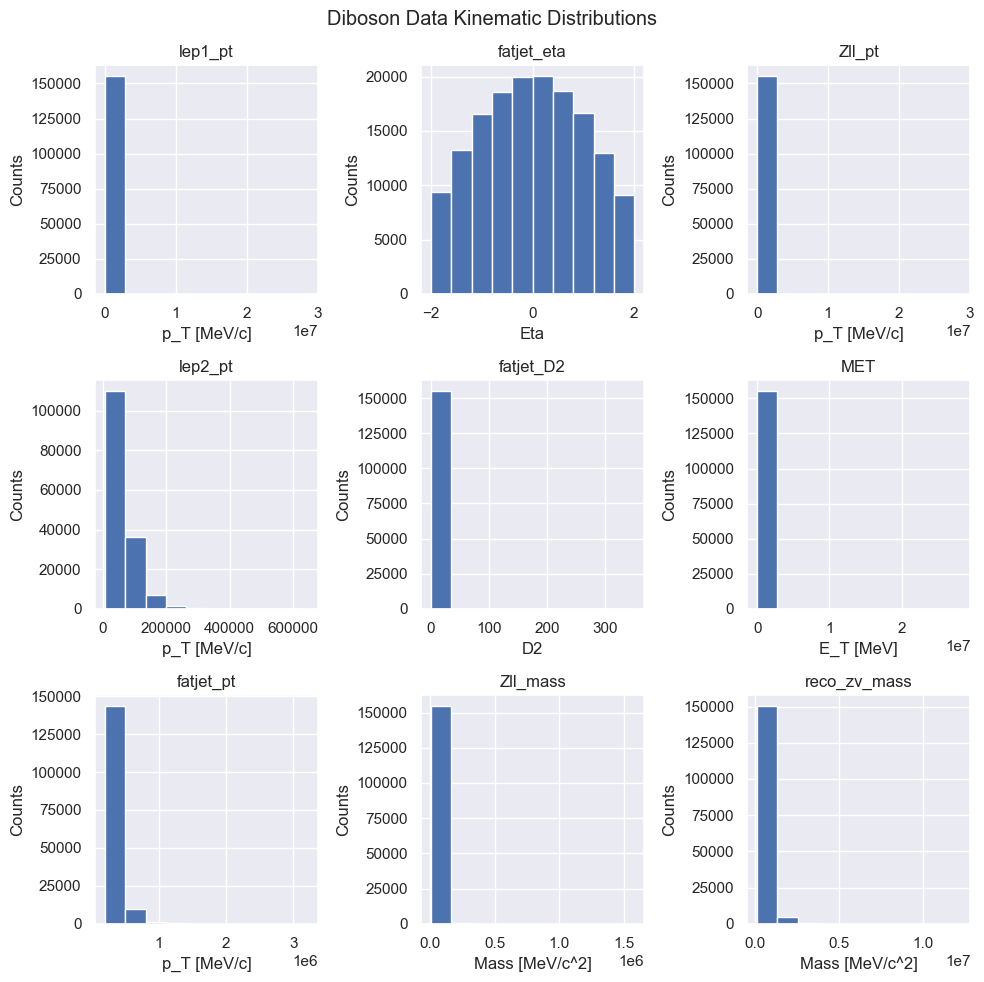

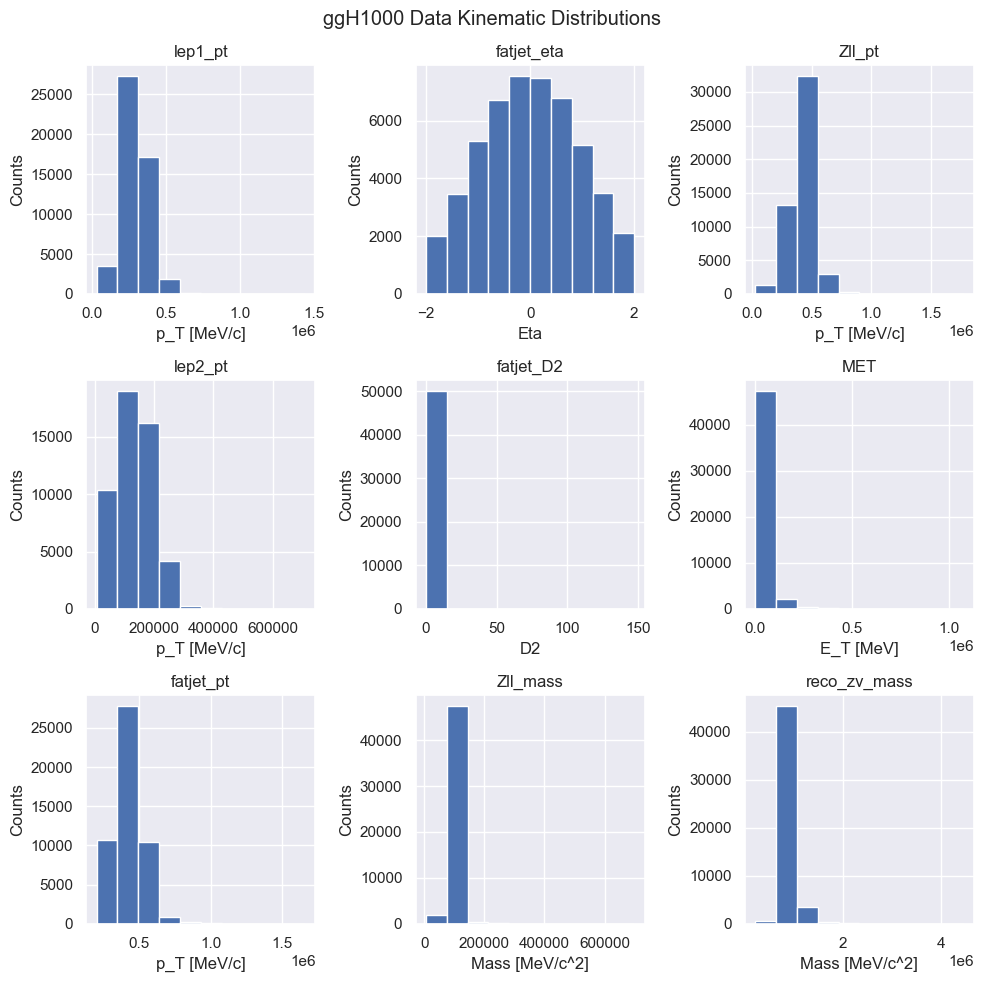

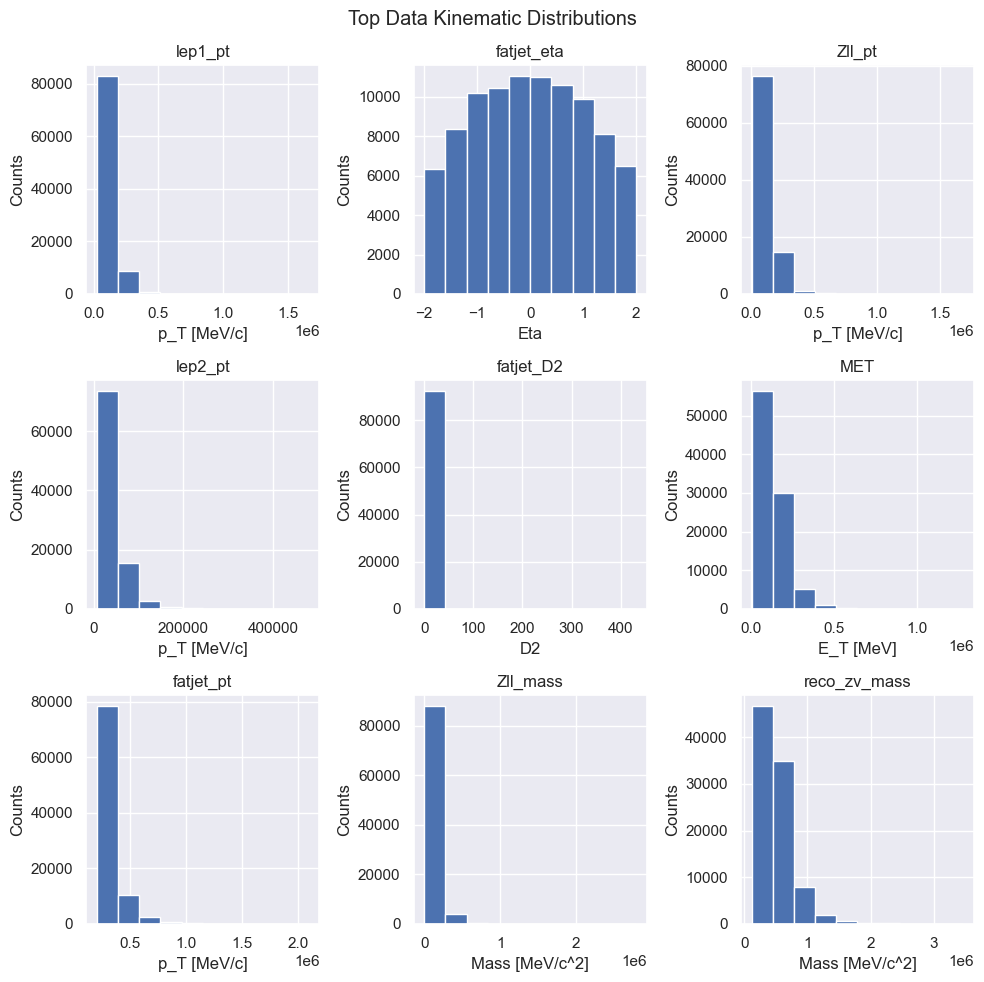

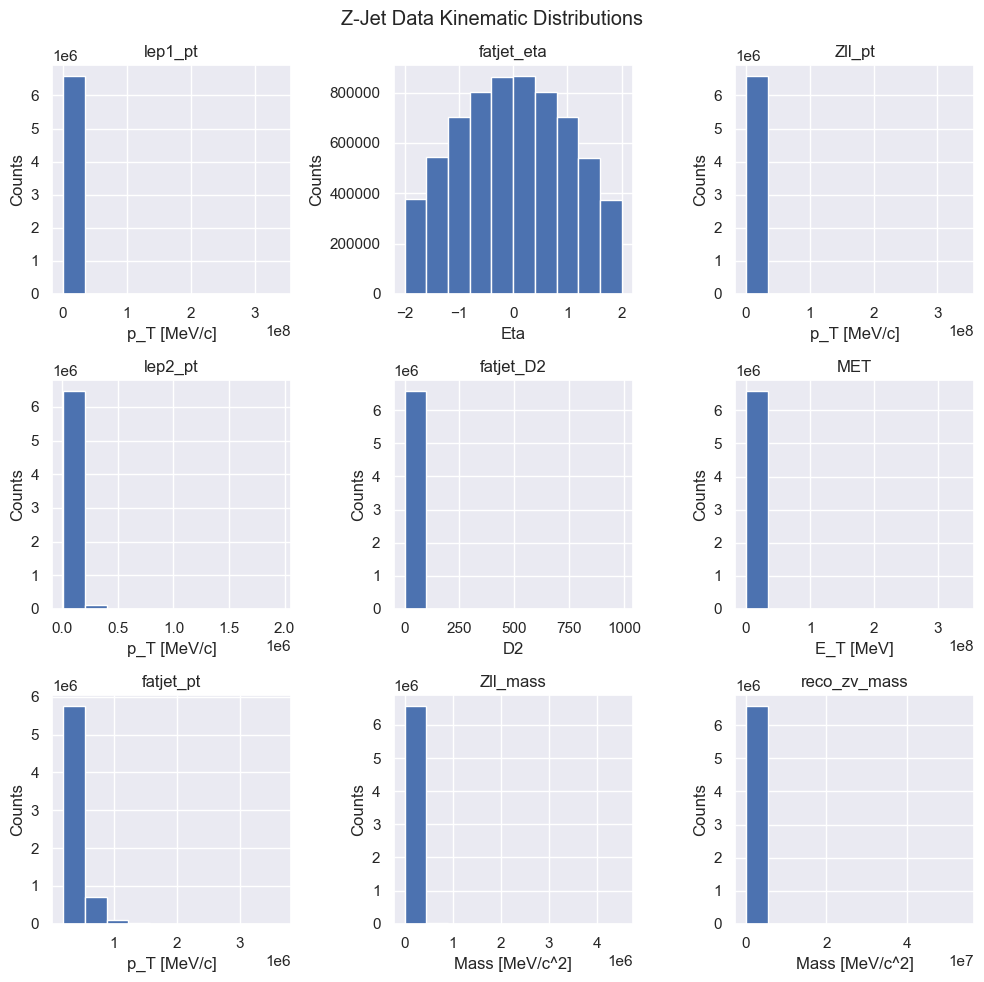

Overlay Plots:


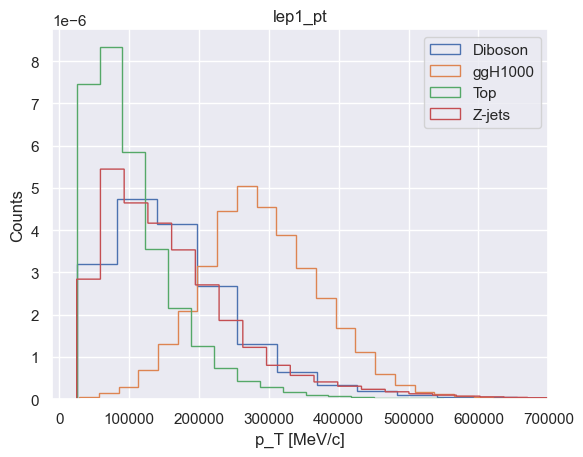

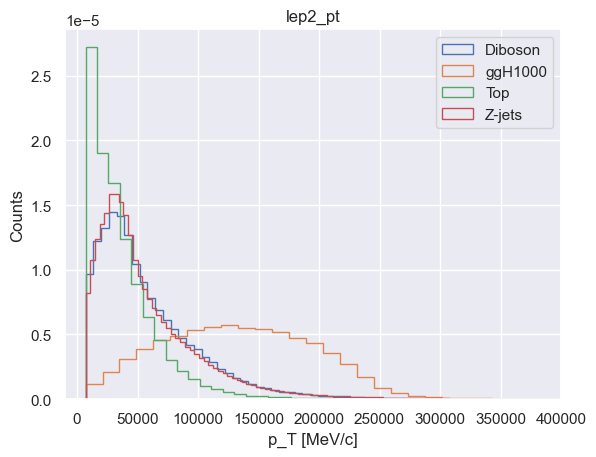

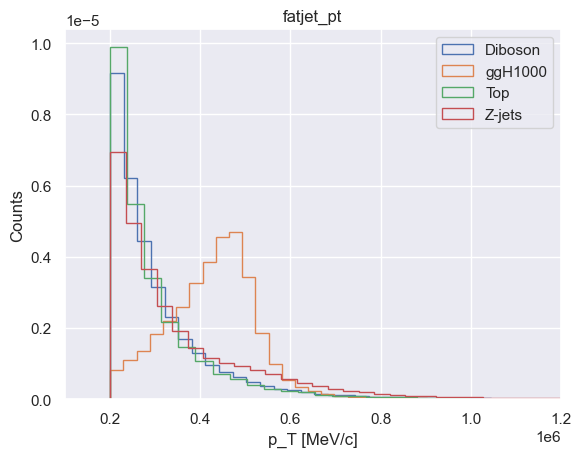

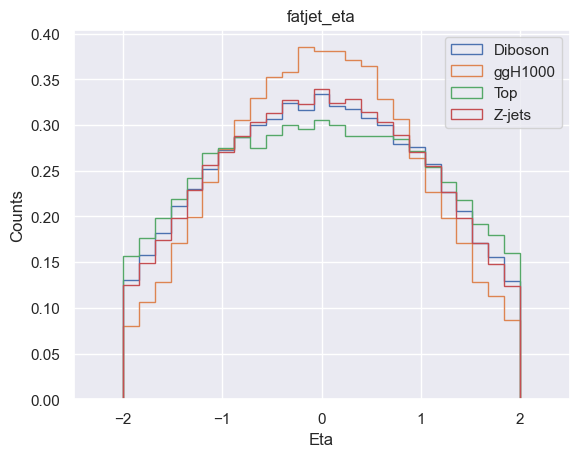

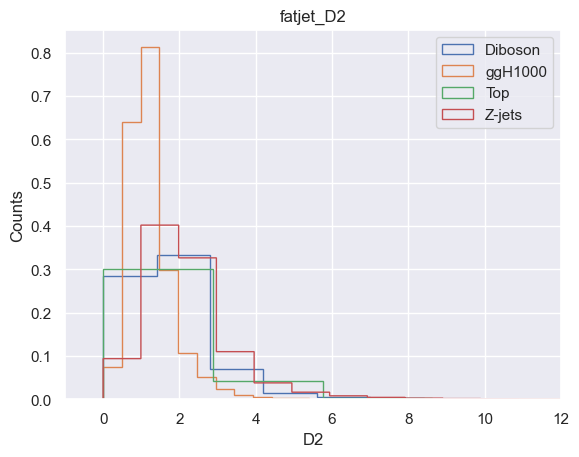

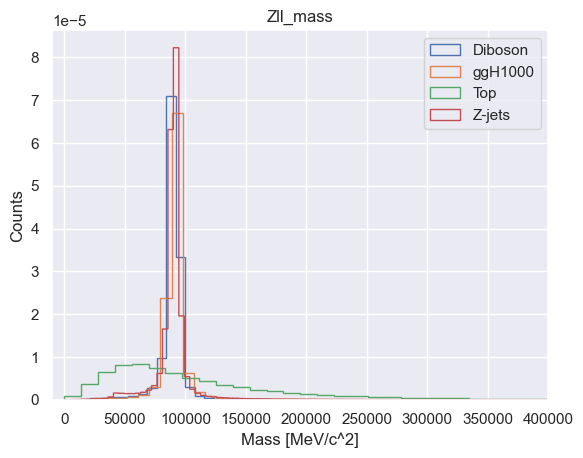

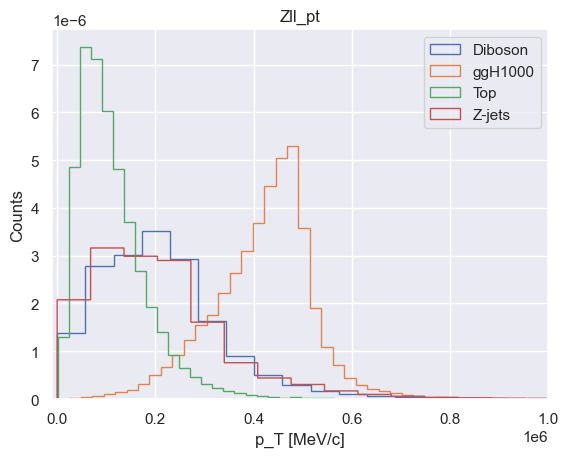

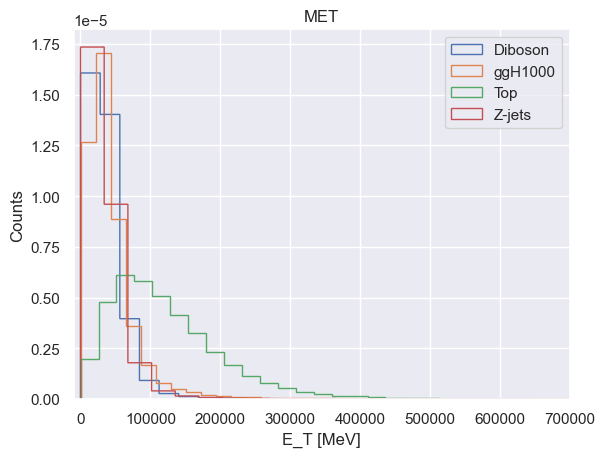

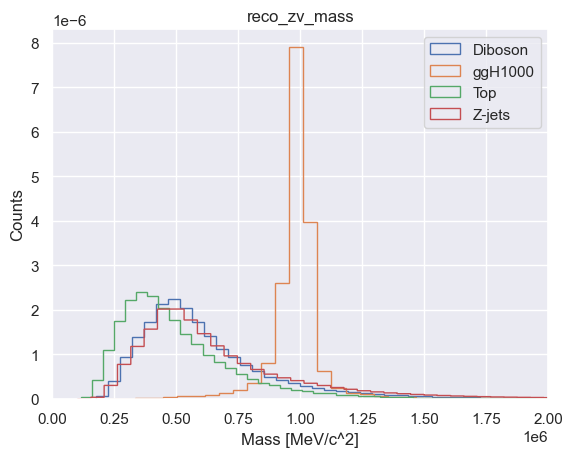

In [7]:
data.plot_kinematics()

(b) Decide “by eye” on the kind of “square” cuts you want to apply (e.g. lep1 pt > 100000, or fatjet pt > 150000, etc.) to make the signal peak more apparent on the reco zv mass spectrum. It is not necessary to do a thorough selection optimisation at this point, we just want to end up with a set of reasonable kinematic cuts that render the signal more visible (The harder you cut on these selection variables, the more difficult it will be to model the background distribution in the next section). Do not apply any kinematic cuts on variable reco zv mass.

The 'signal' data is the data in the ggH1000 dataset, so cuts should attempt to isolate those signals. I chose limits based on the overlay plots by eye to isolate the signal but keep enough background to accurately model it. The code for making cuts is contained in Project4.apply_cuts().

In [8]:
data.apply_cuts()
data.cut_df.head()

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
31,0.826856,13082.848,1,91980.450,540568.56,0.243351,1.121159,584803.00,-0.520686,-0.706220,...,0.961703,2.420115,407838.94,154884.00,-1,0.569624,2.443632,132757.300,1322306.80,-1.0
64,1.672717,31236.885,0,92949.610,535678.80,0.178329,1.772552,501586.38,-0.513682,-1.168403,...,-0.255044,2.459423,390451.00,163142.98,-1,-0.371738,2.824037,152485.170,947830.60,-1.0
141,0.792999,31610.418,0,81121.445,559753.60,0.076410,2.079200,802434.25,-0.857883,3.126914,...,0.179588,-0.055877,318040.28,243886.73,1,-0.068348,0.096752,243318.170,1268182.80,-1.0
154,0.824296,16089.765,1,90967.260,327480.10,0.125485,0.645007,541680.90,0.365188,-0.872437,...,0.474783,2.523068,242525.30,96074.22,1,0.183956,1.991481,94471.266,836998.56,-1.0
181,0.746335,23516.020,0,89334.445,471044.20,0.118333,1.784447,468727.30,-0.012657,-0.831552,...,0.189326,2.263561,327715.44,168051.20,1,0.558843,2.437068,144839.330,959944.00,-1.0


The following graph shows the data post-cuts in blue overlayed with the original signal data. 

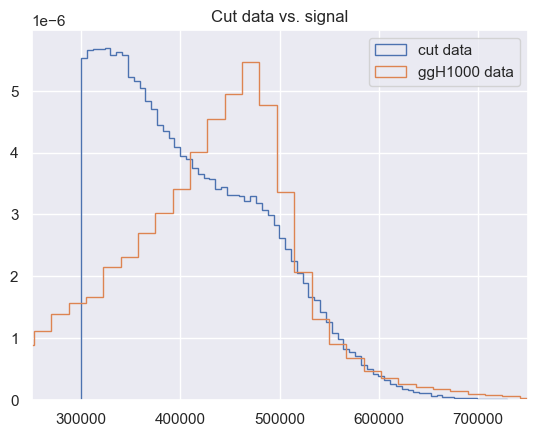

In [9]:
plt.figure()
plt.hist(data.cut_df['Zll_pt'], bins=75, density=True, histtype='step')
plt.hist(data.gg['Zll_pt'], density=True, bins=100, histtype='step')
plt.title('Cut data vs. signal')
plt.legend(['cut data', 'ggH1000 data'])
plt.xlim(0.25*10**6, 0.75*10**6)
plt.show()

(c) We will use variable FullEventWeight to normalise (i.e. inter-calibrate) the relative contributions of the various (signal and background) processes. This simply means that the contributions from the entries in the CSV files need to be scaled up or down, according to a pre-calculated weight (which is related to the cross-section of the corresponding physics process). This is done by passing an array to the “weights=” option in method matplotlib.pyplot.hist. Make sure you understand the distinction between an entry (one separate line of data in a dataframe) and an event (the expected weighted contribution of an entry in the final dataset before or after the kinematic selections). Create reco_zv_mass distributions for the combined background and signal samples, and integrate them to find the total number of signal and background events before and after kinematic cuts.

The charts in this section compare the original and cut data distributions when normalized by the weights in the 'FullEventWeight' column. The first chart displays the normalized full dataset, and the second shows the normalized cut dataset, with the addition of the weighted original signal data to indicate where a peak would be expected.

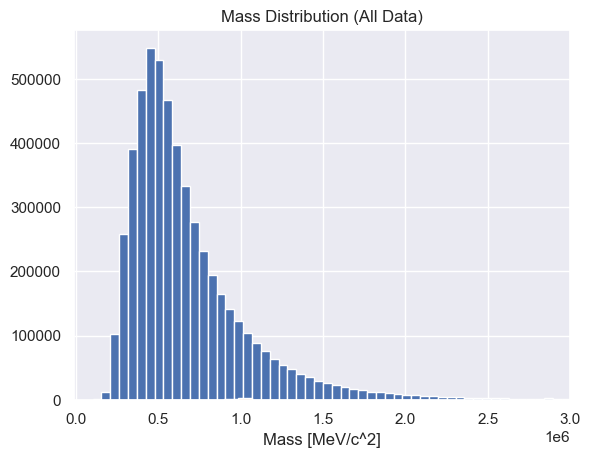

In [10]:
plt.figure()
out_full = plt.hist(data.all['reco_zv_mass'], bins=1000, weights=data.all['FullEventWeight'])
plt.hist(data.gg['reco_zv_mass'], bins=50, weights=data.gg['FullEventWeight'])
plt.xlim(-10**4, 3*10**6)
plt.xlabel('Mass [MeV/c^2]')
plt.title('Mass Distribution (All Data)')
plt.show()

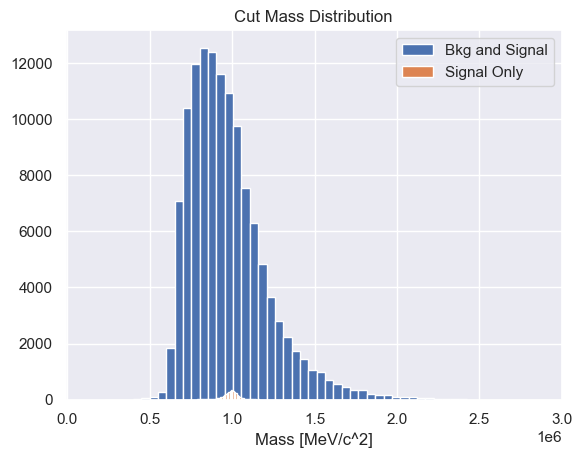

In [11]:
plt.figure()
out_cut = plt.hist(data.cut_df['reco_zv_mass'], bins=55, weights=data.cut_df['FullEventWeight'])
out_gg = plt.hist(data.gg['reco_zv_mass'], bins=500, weights=data.gg['FullEventWeight'])
plt.xlabel('Mass [MeV/c^2]')
plt.title('Cut Mass Distribution')
plt.legend(['Bkg and Signal', 'Signal Only'])
plt.xlim(-10**4, 3*10**6)
plt.show()

By saving the bin information from the histograms, I was able to essentially integrate both the original and cut curves through a Reimann sum, summing over the product of bin height and width for each bin. This integration yields the approximate number of events in each dataset. 

In [12]:
sum(out_full[0]*np.diff(out_full[1]))

290493294214.1092

In [13]:
sum(out_cut[0]*np.diff(out_cut[1]))

6335623946.012507

The original, uncut dataset contains about 290,493,294,214 events, while the cut dataset has been pared down to 6,335,623,946 events. 

## II. Fitting and Hypothesis Testing

(a) Model the reco_zv_mass mass spectrum for the signal and background processes separately after the chosen selection cuts with appropriate fitting functions. You may want to try using e.g. a single Gaussian for the signal and a polynomial for the background. These suggestions may not work if you have significantly altered (“sculpted”) the mass spectrum in your effort to make the signal more visible. You probably want to perform the fit on a subrange of the mass spectrum (see Fig. 1).

Visualizing the mass distribution over the range of interest:

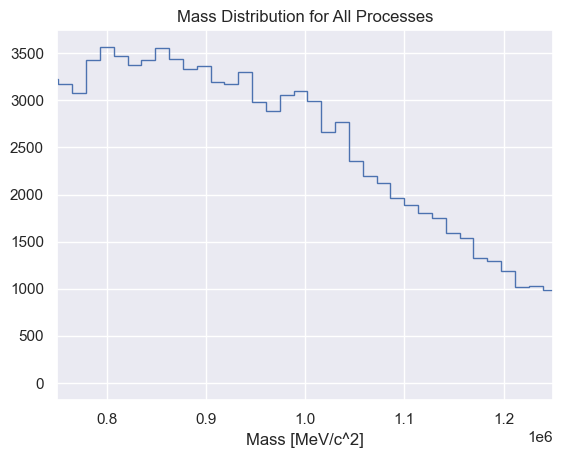

In [14]:
plt.figure()
output = plt.hist(data.cut_df['reco_zv_mass'], bins=200, histtype='step', weights=data.cut_df['FullEventWeight'])
plt.title('Mass Distribution for All Processes')
plt.xlabel('Mass [MeV/c^2]')
plt.xlim(0.75*10**6, 1.25*10**6)
plt.show()

In the cells below, I record the bin counts and mass positions as 'y' and 'x' in a new subset dataframe that spans the range shown in the plot above. 

In [15]:
ys = output[0]
xes = output[1][0:len(output[1]) - 1]
subset_df = pd.DataFrame({'y': ys, 'x': xes})

In [16]:
gg_ys = out_gg[0]
gg_xes = out_gg[1][0:len(gg_ys)]
subset_gg = pd.DataFrame({'y':gg_ys, 'x': gg_xes})

In [17]:
subset_df.sort_values(by='x')

,y,x
0,0.733525,346767.200
1,0.754040,360711.968
2,0.000000,374656.736
3,0.668239,388601.504
4,0.760571,402546.272
...,...,...
195,0.000000,3065996.960
196,0.000000,3079941.728
197,1.323278,3093886.496
198,0.000000,3107831.264


Using my subset data, I fit a polynomial (parabola) to model the background.

In [18]:
from numpy.polynomial.polynomial import polyfit

In [19]:
subset_df_a = subset_df[subset_df['x'] > 0.75*10**6]
subset_df_a = subset_df_a[subset_df_a['x'] < 1.25*10**6]

In [20]:
subset_gg_a = subset_gg[subset_gg['x'] > 0.75*10**6]
subset_gg_a = subset_gg_a[subset_gg_a['x'] < 1.25*10**6]

In [21]:
coeffs = polyfit(subset_df_a['x'], subset_df_a['y'], deg=2)

In [22]:
coeffs

array([-4.31442773e+03,  1.99189556e-02, -1.28229343e-08])

The coefficients of my quadratic are determined by the polyfit and contained in the 'coeffs' array.


background = $-4.314*10^3 + 1.992*10^{-2} x - 1.282*10^{-8} x^2$

Knowing these coefficients, I can come up with a set of points that correspond with the model's path to be used in plotting and calculations.

In [23]:
model_y = []

for value in subset_df_a['x']:
    y = coeffs[2]*value**2 + 1.992*10**(-2)*value + coeffs[0]
    model_y.append(y)

new_index = subset_df_a.index
model_ys = pd.Series(model_y, name='model_y', index=new_index)

subset_bkg = pd.concat([subset_df_a, model_ys], axis=1)

In [24]:
subset_bkg.head()

,y,x,model_y
29,3178.075707,751165.472,3413.453363
30,3081.563364,765110.240,3420.103569
31,3433.229550,779055.008,3421.766769
32,3567.571553,792999.776,3418.442961
33,3476.073176,806944.544,3410.132146


The following plot shows how the quadratic models the background data in this region.

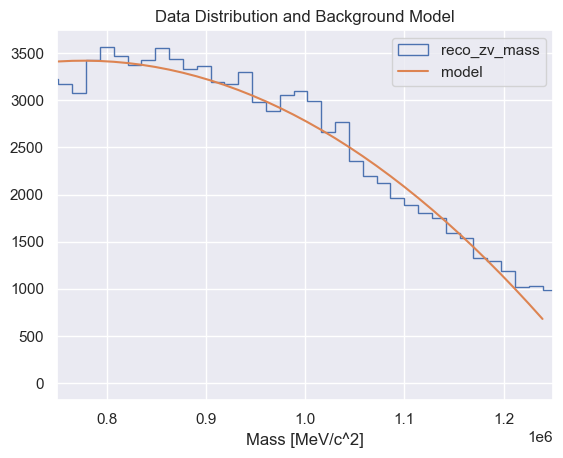

In [25]:
plt.figure()
plt.hist(data.cut_df['reco_zv_mass'], bins=200, histtype='step', weights=data.cut_df['FullEventWeight'])
plt.plot(subset_bkg['x'], subset_bkg['model_y'])
plt.xlabel('Mass [MeV/c^2]')
plt.title('Data Distribution and Background Model')
plt.legend(['reco_zv_mass', 'model'])
plt.xlim(0.75*10**6, 1.25*10**6)
plt.show()

Next up is modelling the signal using a Gaussian distribution. The plot below shows the distribution of mass datapoints for the signal dataset. The y axis indicates counts while the x shows at which masses the signal is most prevalent.

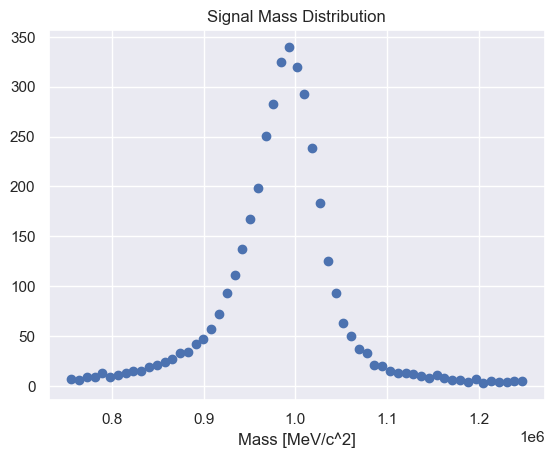

In [26]:
plt.figure()
plt.scatter(subset_gg_a['x'], subset_gg_a['y'])
plt.xlabel('Mass [MeV/c^2]')
plt.title('Signal Mass Distribution')
plt.show()

To model this distribution, I use a Gaussian of height ~350, mean ~$1*10^6$, and standard deviation $4*10^4$.

In [27]:
from scipy.optimize import curve_fit

In [28]:
def Gauss(x, A, u, B):
    y = []
    for item in x:
        gauss = A*np.exp(-0.5*((item - u)/B)**2)
        y.append(gauss)
    return y

In [29]:
fit_y = Gauss(subset_bkg['x'], 348, 0.994*10**6, 4*10**4)

In [30]:
testing_df = pd.concat([subset_bkg.set_index(subset_bkg['x']), pd.Series(fit_y, name='fit_sig', index=subset_bkg['x'])], axis=1)

In [31]:
testing_df.head()

,y,x,model_y,fit_sig
x,,,,
751165.472,3178.075707,751165.472,3413.453363,0.000003
765110.240,3081.563364,765110.240,3420.103569,0.000027
779055.008,3433.229550,779055.008,3421.766769,0.000187
792999.776,3567.571553,792999.776,3418.442961,0.001144
806944.544,3476.073176,806944.544,3410.132146,0.006207


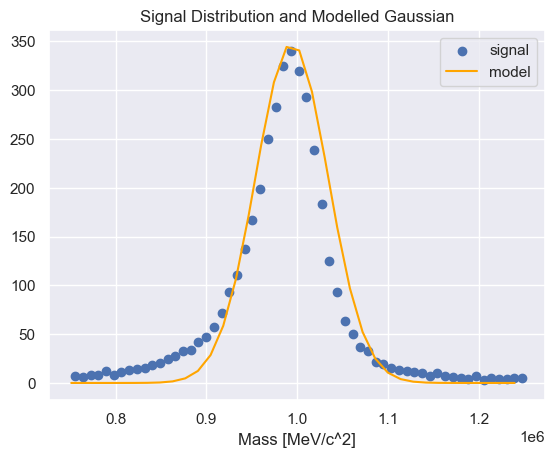

In [32]:
plt.figure()
plt.scatter(subset_gg_a['x'], subset_gg_a['y'])
plt.plot(subset_bkg['x'], fit_y, c='orange')
plt.title('Signal Distribution and Modelled Gaussian')
plt.legend(['signal', 'model'])
plt.xlabel('Mass [MeV/c^2]')
plt.show()

(b) Model the joint signal-plus-background mass spectrum by using a weighted sum of the fit functions implemented in the previous step. Keep the parameters of the signal model (e.g. mean and sigma for a Gaussian) fixed to the values determined by the fit on the signal-only spectrum, but with the overall normalisation left as a free parameter. Assume that the background shape is unknown (i.e. you can use your function of choice, but all parameters should be free to float in the fit).

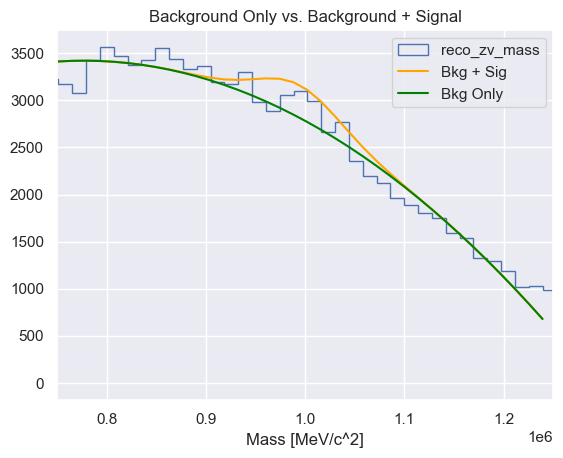

In [33]:
plt.figure()
h, bins, oth = plt.hist(data.cut_df['reco_zv_mass'], bins=200, histtype='step', weights=data.cut_df['FullEventWeight'])
plt.plot(testing_df.index, testing_df['model_y'] + testing_df['fit_sig'], c='orange')
plt.plot(testing_df.index, testing_df['model_y'], c='green')
plt.xlabel('Mass [MeV/c^2]')
plt.title('Background Only vs. Background + Signal')
plt.legend(['reco_zv_mass', 'Bkg + Sig', 'Bkg Only'])
plt.xlim(0.75*10**6, 1.25*10**6)
plt.show()

(c) Carry out two fits, assuming H1 and H0 hypotheses. Use Wilk’s theorem to calculate the statistical significance of the signal-like deviation in the joint mass spectrum.

The $H_0$ hypothesis assumes there is no signal; any fluctuations must be due to the background. The $H_1$ hypothesis assumes that there is a signal, in this case modelled by a Gaussian distribution. 


To quantify how much better a signal (or background) model is than its counterpart, I will calculate the $\chi^2$ values for both hypotheses. To do this, I need to calculate the sum of the weights of each bin in the histogram over which the two hypotheses are modelled and compare that sum to the predicted model value through the equation:

$\chi^2 = \Sigma_i \frac{[\Sigma_{j=1}^n w_j^{(i)} - N_{predicted}^{(i)}]^2}{\Sigma (w_j^{(i)})^2}$

To calculate these summed weights, I have isolated the weights corresponding to mass values within each bin and summed them, storing them in a list.

In [34]:
summed_weights = []
count = 0

while count < len(bins) - 1:
    lower_lim = bins[count]
    upper_lim = bins[count + 1]
    
    indices = []
    for item in data.cut_df.index:
        if data.cut_df['reco_zv_mass'][item] < upper_lim:
            if data.cut_df['reco_zv_mass'][item] > lower_lim:
                indices.append(item)
    
    weights = data.cut_df['FullEventWeight'][indices]
    
    summed_weights.append(sum(weights))
    count += 1

In [35]:
net_w = pd.Series(summed_weights, name='net_w')
x_vals = pd.Series(bins, name='x')
subset_df_w = pd.concat([x_vals, net_w], axis=1)

In [36]:
subset_df_w.head()

,x,net_w
0,346767.200,0.000000
1,360711.968,0.754040
2,374656.736,0.000000
3,388601.504,0.668239
4,402546.272,0.760571


In [37]:
def calc_chi2(index, weights, predicted):
    chi2s = []
    for i in index:
        if weights[i] < 0.000001:
            pass
        if weights[i] is np.nan:
            pass
        else:
            chi2_i = ((weights[i] - predicted[i])**2)/(weights[i]**2)
            chi2s.append(chi2_i)
    
    chi2 = sum(chi2s)
    return chi2

In [38]:
subset_w = subset_df_w[subset_df_w['x'] > 0.75*10**6]
subset_w = subset_df_w[subset_df_w['x'] < 1.25*10**6]
subset_w = subset_w.set_index('x')

In [39]:
sig_fit = Gauss(subset_w.index, 348, 0.994*10**6, 4*10**4)

bkg_fit = []

for value in subset_w.index:
    y = coeffs[2]*value**2 + 1.992*10**(-2)*value + coeffs[0]
    bkg_fit.append(y)

In [40]:
chi_df = pd.DataFrame({'net_w': subset_w['net_w'], 'bkg_fit': bkg_fit, 'sig_fit': sig_fit})

In [41]:
chi_df['bkg_sig_fit'] = chi_df['bkg_fit'] + chi_df['sig_fit']

Calculating chi squared values for both hypotheses:

In [42]:
chi_df['chi2_bkg'] = ((chi_df['net_w'] - chi_df['bkg_fit'])**2/(chi_df['net_w']**2))
chi_df['chi2_bkg'] = chi_df['chi2_bkg'].replace(np.inf, np.nan)

In [43]:
print('H0 model chi squared:', np.nansum(chi_df['chi2_bkg']))

H0 model chi squared: 12380272.848987535


In [44]:
chi_df['chi2_bs'] = ((chi_df['net_w'] - chi_df['bkg_sig_fit'])**2/(chi_df['net_w']**2))
chi_df['chi2_bs'] = chi_df['chi2_bs'].replace(np.inf, np.nan)

In [45]:
print('H1 model chi squared:', np.nansum(chi_df['chi2_bs']))

H1 model chi squared: 12380272.900408577


In [46]:
chi_df.head()

,net_w,bkg_fit,sig_fit,bkg_sig_fit,chi2_bkg,chi2_bs
x,,,,,,
346767.200,0.000000,1051.249220,4.878875e-55,1051.249220,NaN,NaN
360711.968,0.754040,1202.522637,1.293480e-52,1202.522637,2.540113e+06,2.540113e+06
374656.736,0.000000,1348.809046,3.036810e-50,1348.809046,NaN,NaN
388601.504,0.668239,1490.108448,6.313837e-48,1490.108448,4.968011e+06,4.968011e+06
402546.272,0.760571,1626.420843,1.162484e-45,1626.420843,4.568565e+06,4.568565e+06


Wilk's Theorem states that the difference between the $H_0$ and $H_1$ chi squared values asymptotically folloes a chi squared distribution. It's test statistic D is equal to $D = -2*ln \frac{likelihood for H_0}{likelihood for H_1}$

In [54]:
D = np.nansum(chi_df['chi2_bkg']) - np.nansum(chi_df['chi2_bs'])
print('Difference between chi squared values H0 - H1:', D)

Difference between chi squared values H0 - H1: -0.051421042531728745


In [60]:
from scipy.stats import chi2

In [61]:
degs_of_freedom = 1
p_val = 1 - chi2.cdf(D, degs_of_freedom)
print('p-value:', p_val)

p-value: 1.0


## III. Employing a Neural Network Classifier

(a) Create a NN classifier using the input features listed in Table 1. Do not use reco_zv_mass (or FullEventWeight), though. Probably the most important decision you will have to make is which dataset to use for the training of the NN classifier. Should you use the original datasets before any selection cuts? Or the filtered datasets after having applying the selection cuts of the previous Section? Or maybe some intermediate choice with some looser selection cuts? Strictly speaking, there is no “correct” answer here, but some approaches work better than others.  

Make sure the target feature (isSignal) is not one of the inputs for the classifier. Use a 50% signal-50% background admixture for the NN training. You are welcome to try any ML algorithm you want, including algorithms that we have not explicitly covered in checkpoints before. Evalute the classifier performance using some of the standard metrics.

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import models
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn import model_selection, preprocessing

The following block of code isolates the background data and then forms a new dataset comprised of 50% signal datapoints and 50% background. This dataset was formed by randomly picking points from the full background dataset.

In [63]:
# getting a dataset of 50% background and 50% signal

signals = data.gg
background = pd.concat([data.dibos, data.top, data.zjets], ignore_index=True)
bkg = shuffle(background, random_state=42)
bkg = bkg.reset_index(drop=True)

fifty_fifty = pd.concat([signals, bkg.loc[0:len(signals.index)]], ignore_index=True)
fifty50 = shuffle(fifty_fifty, random_state=12)
fifty50 = fifty50.reset_index(drop=True)

Unlike the previous, the dataframe formed in the following cell is a 50/50 background/signal dataset formed using only datapoints from within the cut ranges. I will train my model with both versions to determine which provides the better accuracy. 

In [64]:
cuts = {'lep1_pt': (150000, 500000),
        'lep2_pt': (50000, 250000),
        'fatjet_pt': (0.3*10**6, 0.6*10**6),
        'fatjet_eta': (-1, 1),
        'fatjet_D2': (0, 2.2),
        'Zll_mass': (75000, 110000),
        'Zll_pt': (0.3*10**6, 0.8*10**6),
        'MET': (0, 100000),
       }   

# applying cuts to the full dataset for each kinematic variable        
cut_data = fifty50

for col in data.var_cols:
    if col is 'reco_zv_mass':
        pass
    else:
        cut_data = cut_data[cut_data[col] > cuts[col][0]]
        cut_data = cut_data[cut_data[col] < cuts[col][1]]

In the cell below, input and target data (1) are from the full data 50/50 set, and input and target data (2) are from the cut 50/50 dataset. I am only using the 'lep1_pt', 'lep2_pt', 'fatjet_pt', 'fatjet_eta', 'fatjet_D2', 'Zll_mass', and 'MET' variables as input training variables in the model. The 'isSignal' column is indicated as the target.

This cell also splits the chosen data into training and testing datasets, to be used for validation purposes. In this split, I am using the uncut dataset, and the shapes of each array of training or testing data is shown printed below.

In [65]:
# Using the combined dataset as my input, with the classification column as the target data
input_df_1 = fifty50[['lep1_pt', 'lep2_pt', 'fatjet_pt', 'fatjet_eta', 'fatjet_D2', 'Zll_mass', 'Zll_pt', 'MET']]
input_df_2 = cut_data[['lep1_pt', 'lep2_pt', 'fatjet_pt', 'fatjet_eta', 'fatjet_D2', 'Zll_mass', 'Zll_pt', 'MET']]
target_data_1 = fifty50['isSignal']
target_data_2 = cut_data['isSignal']

sc = preprocessing.StandardScaler()
input_data = sc.fit_transform(input_df_1)

#set random seed
answer_to_everything = 42

#train-test-split the dataset
train_data, test_data, train_target, test_target = model_selection.train_test_split(input_data, target_data_1, test_size=0.3, \
                                                                                    random_state=answer_to_everything)
print(train_data.shape, train_target.shape, test_data.shape, test_target.shape)

(70018, 8) (70018,) (30009, 8) (30009,)


My model is defined below, inspired by my code from Checkpoint 13. I am able to choose my number of nodes and layers. Typically, I like to use 12 nodes and 5 dense layers, and for this data I need 8 inputs -- the kinematic variables.

In [66]:
def my_model(num_inputs, num_nodes, extra_depth):
    # create model
    model = Sequential()
    model.add(Dense(num_nodes, input_dim=num_inputs, kernel_initializer='normal',\
                    activation='relu'))
    model.add(Dropout(0.2))
    
    for i in range(extra_depth):
        model.add(Dense(num_nodes, kernel_initializer='normal'))
    
    model.add(Dense(1, kernel_initializer='normal'))       
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        
    return model

After defining my model, I fit it to the uncut 50/50 training data with batch sizes of 100 over 30 epochs. 

In [67]:
# creating a model with 12 nodes, 8 inputs (the kinematic vars), and 5 dense layers
model = my_model(8, 12, 3)

history = model.fit(train_data, train_target, batch_size=100, epochs=30, verbose=1, \
                        validation_data=(test_data, test_target))

Epoch 1/30
701/701 [==============================] - 2s 2ms/step - loss: 0.8633 - accuracy: 0.6862 - val_loss: 0.5285 - val_accuracy: 0.7874
Epoch 2/30
701/701 [==============================] - 1s 2ms/step - loss: 0.5660 - accuracy: 0.8152 - val_loss: 0.5155 - val_accuracy: 0.8556
Epoch 3/30
701/701 [==============================] - 1s 2ms/step - loss: 0.5191 - accuracy: 0.8293 - val_loss: 0.4999 - val_accuracy: 0.8687
Epoch 4/30
701/701 [==============================] - 1s 2ms/step - loss: 0.5574 - accuracy: 0.7912 - val_loss: 0.5426 - val_accuracy: 0.8567
Epoch 5/30
701/701 [==============================] - 1s 2ms/step - loss: 0.5430 - accuracy: 0.8474 - val_loss: 0.5184 - val_accuracy: 0.8690
Epoch 6/30
701/701 [==============================] - 1s 2ms/step - loss: 0.5061 - accuracy: 0.8351 - val_loss: 0.4687 - val_accuracy: 0.7866
Epoch 7/30
701/701 [==============================] - 1s 2ms/step - loss: 0.4748 - accuracy: 0.8494 - val_loss: 0.4280 - val_accuracy: 0.8686
Epoch 

Validation accuracy for this dataset hovers around 86 to 87%.

Next I want to see how the cut 50/50 dataset compares to this performance.

In [68]:
sc = preprocessing.StandardScaler()
input_data = sc.fit_transform(input_df_2)

#set random seed
answer_to_everything = 42

#train-test-split the dataset
train_data, test_data, train_target, test_target = model_selection.train_test_split(input_data, target_data_2, test_size=0.3, \
                                                                                    random_state=answer_to_everything)
print(train_data.shape, train_target.shape, test_data.shape, test_target.shape)

(15864, 8) (15864,) (6799, 8) (6799,)


I utilize the same model format, but with different training data.

In [69]:
# creating a model with 12 nodes, 8 inputs (the kinematic vars), and 5 dense layers
model_2 = my_model(8, 12, 3)

history_2 = model_2.fit(train_data, train_target, batch_size=100, epochs=30, verbose=1, \
                        validation_data=(test_data, test_target))

Epoch 1/30
159/159 [==============================] - 1s 3ms/step - loss: 2.8682 - accuracy: 0.1131 - val_loss: 0.5079 - val_accuracy: 0.8728
Epoch 2/30
159/159 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.9112 - val_loss: 0.4670 - val_accuracy: 0.9431
Epoch 3/30
159/159 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.9299 - val_loss: 0.4868 - val_accuracy: 0.9440
Epoch 4/30
159/159 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.9326 - val_loss: 0.4253 - val_accuracy: 0.9295
Epoch 5/30
159/159 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.9270 - val_loss: 0.4801 - val_accuracy: 0.9441
Epoch 6/30
159/159 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.9371 - val_loss: 0.4859 - val_accuracy: 0.9450
Epoch 7/30
159/159 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.9390 - val_loss: 0.4758 - val_accuracy: 0.9448
Epoch 

This run has improved upon the validation accuracy of the previous, with values of around 94%. This indicates that the cut dataset provides better classification results. 

(b) Run the prediction of the model on the full (signal plus background) dataset of your choice. Reject events that have a predicted probability for the isSignal target feature less than 50%. Plot the “cleaned” reco zv mass mass spectrum. Is the signal visible? If not, you may want to ensure that your NN filtering is not looser than the set of selection cuts you applied in the previous Section (i.e. use the NN output on top of the previously applied selection cuts).

I've chosen to run the prediction on the full cut dataset. 

In [70]:
input_df_3 = data.cut_df[['lep1_pt', 'lep2_pt', 'fatjet_pt', 'fatjet_eta', 'fatjet_D2', 'Zll_mass', 'Zll_pt', 'MET']]
target_data_3 = data.cut_df['isSignal']

sc = preprocessing.StandardScaler()
input_data = sc.fit_transform(input_df_3)

chosen = input_data
chosen_target = target_data_3

In [71]:
# getting a prediction on the test data
predicted = model_2.predict(chosen)

5944/5944 [==============================] - 5s 869us/step


In [72]:
add_pred = data.cut_df
add_pred['pred_sig'] = predicted

In [73]:
add_pred.head()

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass,pred_sig
31,0.826856,13082.848,1,91980.450,540568.56,0.243351,1.121159,584803.00,-0.520686,-0.706220,...,2.420115,407838.94,154884.00,-1,0.569624,2.443632,132757.300,1322306.80,-1.0,1.388589
64,1.672717,31236.885,0,92949.610,535678.80,0.178329,1.772552,501586.38,-0.513682,-1.168403,...,2.459423,390451.00,163142.98,-1,-0.371738,2.824037,152485.170,947830.60,-1.0,1.024679
141,0.792999,31610.418,0,81121.445,559753.60,0.076410,2.079200,802434.25,-0.857883,3.126914,...,-0.055877,318040.28,243886.73,1,-0.068348,0.096752,243318.170,1268182.80,-1.0,1.485122
154,0.824296,16089.765,1,90967.260,327480.10,0.125485,0.645007,541680.90,0.365188,-0.872437,...,2.523068,242525.30,96074.22,1,0.183956,1.991481,94471.266,836998.56,-1.0,1.428061
181,0.746335,23516.020,0,89334.445,471044.20,0.118333,1.784447,468727.30,-0.012657,-0.831552,...,2.263561,327715.44,168051.20,1,0.558843,2.437068,144839.330,959944.00,-1.0,0.989493


The following line keeps only datapoints that have a probability of being signal greater than 50%. The plot below shows the histogram of that selected data plotted against the uncut signal data. As seen in the graph, the mass distribution yielded by the neural network's classifier does appear to have a peak in the same location as the signal data.

In [74]:
selected_data = add_pred[add_pred['pred_sig'] > 0.5]

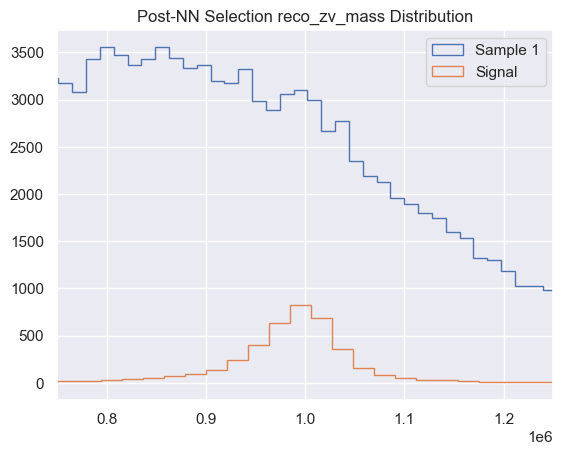

In [75]:
plt.figure()
h, bins_2, oth = plt.hist(selected_data['reco_zv_mass'], bins=200, histtype='step', weights=selected_data['FullEventWeight'])
plt.hist(data.gg['reco_zv_mass'], bins=200, histtype='step', weights=data.gg['FullEventWeight'])
plt.xlim(0.75*10**6, 1.25*10**6)
plt.title('Post-NN Selection reco_zv_mass Distribution')
plt.legend(['Sample 1', 'Signal'])
plt.show()

In [76]:
def to_binary(input_array):
    binary_version = []
    
    for item in input_array:
        if item > 0.5:
            binary_version.append(1)
        else:
            binary_version.append(0)
    
    return binary_version

Confusion matrices show how well a neural network has classified data. Ideally, the top left and bottom right corners would contain the most counts, as that would indicate a good classification performance.

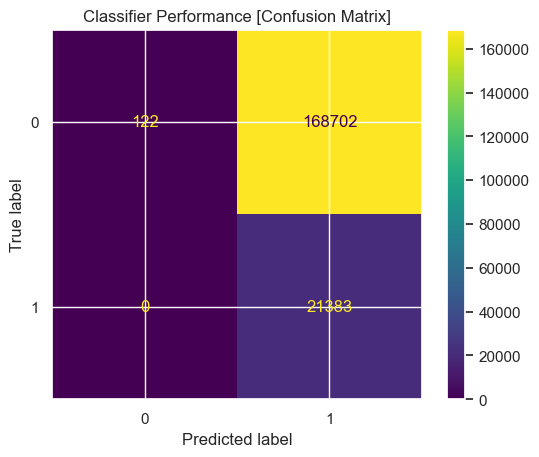

In [77]:
# plotting a confusion matrix to see how well the model predicts the classification of the test data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = chosen_target
y_pred = to_binary(predicted)

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title('Classifier Performance [Confusion Matrix]')
plt.show()

Based on the matrix above, the classifier works well to identify actual signals, but often calls false positives.

(c) Repeat the two-fit procedure, assuming H1 and H0 hypotheses, and calculate the statistical significance of the signal-like deviation. Is the result better or worse than the one obtained in the previous Section?

In [78]:
summed_weights_2 = []
count = 0

while count < len(bins_2) - 1:
    lower_lim = bins_2[count]
    upper_lim = bins_2[count + 1]
    
    indices = []
    for item in selected_data.index:
        if selected_data['reco_zv_mass'][item] < upper_lim:
            if selected_data['reco_zv_mass'][item] > lower_lim:
                indices.append(item)
    
    weights = data.cut_df['FullEventWeight'][indices]
    
    summed_weights_2.append(sum(weights))
    count += 1

In [79]:
net_w_2 = pd.Series(summed_weights_2, name='net_w')
x_vals_2 = pd.Series(bins_2, name='x')
subset_df_w_2 = pd.concat([x_vals_2, net_w_2], axis=1)

In [80]:
subset_w_2 = subset_df_w_2[subset_df_w_2['x'] > 0.75*10**6]
subset_w_2 = subset_df_w_2[subset_df_w_2['x'] < 1.25*10**6]
subset_w_2 = subset_w_2.set_index('x')

In [81]:
sig_fit_2 = Gauss(subset_w_2.index, 348, 0.994*10**6, 4*10**4)

bkg_fit_2 = []

for value in subset_w_2.index:
    y = coeffs[2]*value**2 + 1.992*10**(-2)*value + coeffs[0]
    bkg_fit_2.append(y)

In [82]:
chi_df_2 = pd.DataFrame({'net_w': subset_w_2['net_w'], 'bkg_fit': bkg_fit_2, 'sig_fit': sig_fit_2})
chi_df_2['bkg_sig_fit'] = chi_df_2['bkg_fit'] + chi_df_2['sig_fit']
chi_df_2['chi2_bkg'] = ((chi_df_2['net_w'] - chi_df_2['bkg_fit'])**2/(chi_df_2['net_w']**2))
chi_df_2['chi2_bkg'] = chi_df_2['chi2_bkg'].replace(np.inf, np.nan)
chi_df_2['chi2_bs'] = ((chi_df_2['net_w'] - chi_df_2['bkg_sig_fit'])**2/(chi_df_2['net_w']**2))
chi_df_2['chi2_bs'] = chi_df_2['chi2_bs'].replace(np.inf, np.nan)

In [83]:
print('NN Results:')
print('H0 model chi squared:', np.nansum(chi_df_2['chi2_bkg']))
print('H1 model chi squared:', np.nansum(chi_df_2['chi2_bs']))

NN Results:
H0 model chi squared: 12380719.650409844
H1 model chi squared: 12380719.701523751


In [84]:
print('Analytical Method Results:')
print('H0 model chi squared:', np.nansum(chi_df['chi2_bkg']))
print('H1 model chi squared:', np.nansum(chi_df['chi2_bs']))

Analytical Method Results:
H0 model chi squared: 12380272.848987535
H1 model chi squared: 12380272.900408577


This neural network method has not improved on the previous results, as the chi squared values are higher.

In [94]:
D = np.nansum(chi_df['chi2_bkg']) - np.nansum(chi_df['chi2_bs'])
print('Difference between chi squared values H0 - H1:', D)
degs_of_freedom = 1
p_val = 1 - chi2.cdf(D, degs_of_freedom)
print('p-value:', p_val)

Difference between chi squared values H0 - H1: -0.051421042531728745
p-value: 1.0


## IV. Impact of Training Sample on Classifier

(a) Design a new NN classifier, after incorporating reco_zv_mass somehow in the training: either by using a training dataset defined after some selection on the variable reco zv mass has been applied, or by explicitly making it one of the input features of the NN classifier.

In this section, I have incorporated reco_zv_mass as an additional input in the training data. I fit my model and run a prediction similarly to the models in section III. 

In [85]:
input_df_4 = cut_data[['lep1_pt', 'lep2_pt', 'fatjet_pt', 'fatjet_eta', 'fatjet_D2', 'Zll_mass', 'Zll_pt', 'MET', 'reco_zv_mass']]
target_data_4 = cut_data['isSignal']

sc = preprocessing.StandardScaler()
input_data = sc.fit_transform(input_df_4)

#set random seed
answer_to_everything = 42

#train-test-split the dataset
train_data, test_data, train_target, test_target = model_selection.train_test_split(\
                                                                                    input_data, target_data_4, test_size=0.3, \
                                                                                    random_state=answer_to_everything)
print(train_data.shape, train_target.shape, test_data.shape, test_target.shape)

(15864, 9) (15864,) (6799, 9) (6799,)


In [86]:
model_3 = my_model(9, 12, 3)

history_3 = model_3.fit(train_data, train_target, batch_size=100, epochs=30, verbose=1, \
                        validation_data=(test_data, test_target))

Epoch 1/30
159/159 [==============================] - 1s 3ms/step - loss: 2.9816 - accuracy: 0.0784 - val_loss: 0.6987 - val_accuracy: 0.5543
Epoch 2/30
159/159 [==============================] - 0s 2ms/step - loss: 0.5148 - accuracy: 0.8979 - val_loss: 0.4867 - val_accuracy: 0.9476
Epoch 3/30
159/159 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.9280 - val_loss: 0.4657 - val_accuracy: 0.9418
Epoch 4/30
159/159 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.9322 - val_loss: 0.4565 - val_accuracy: 0.9469
Epoch 5/30
159/159 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 0.9419 - val_loss: 0.5251 - val_accuracy: 0.9507
Epoch 6/30
159/159 [==============================] - 0s 2ms/step - loss: 0.4664 - accuracy: 0.9396 - val_loss: 0.4649 - val_accuracy: 0.9513
Epoch 7/30
159/159 [==============================] - 0s 2ms/step - loss: 0.4687 - accuracy: 0.9450 - val_loss: 0.4939 - val_accuracy: 0.9526
Epoch 

In [87]:
chosen_2 = sc.fit_transform(data.cut_df[['lep1_pt', 'lep2_pt', 'fatjet_pt', 'fatjet_eta', 'fatjet_D2', 'Zll_mass', 'Zll_pt', 'MET', 
                                       'reco_zv_mass']])
chosen_target_2 = data.cut_df['isSignal']

In [88]:
predicted_2 = model_3.predict(chosen_2)

5944/5944 [==============================] - 5s 877us/step


In [89]:
add_pred_2 = data.cut_df
add_pred_2['pred_sig'] = predicted_2

In [90]:
selected_data_2 = add_pred_2[add_pred_2['pred_sig'] > 0.5]

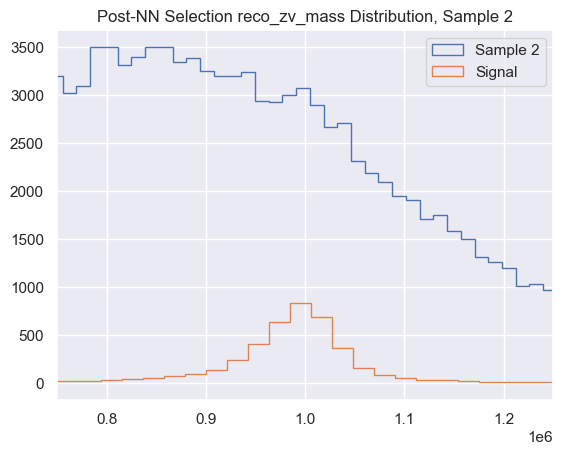

In [91]:
plt.figure()
plt.hist(selected_data_2['reco_zv_mass'], bins=200, histtype='step', weights=selected_data_2['FullEventWeight'])
plt.hist(data.gg['reco_zv_mass'], bins=200, histtype='step', weights=data.gg['FullEventWeight'])
plt.xlim(0.75*10**6, 1.25*10**6)
plt.title('Post-NN Selection reco_zv_mass Distribution, Sample 2')
plt.legend(['Sample 2', 'Signal'])
plt.show()

(b) Do not attempt any fits, but do repeat the procedure of the previous Section, and overlay the mass distributions for signal and background. Is the signal more or less visible now compared to the previous Section?

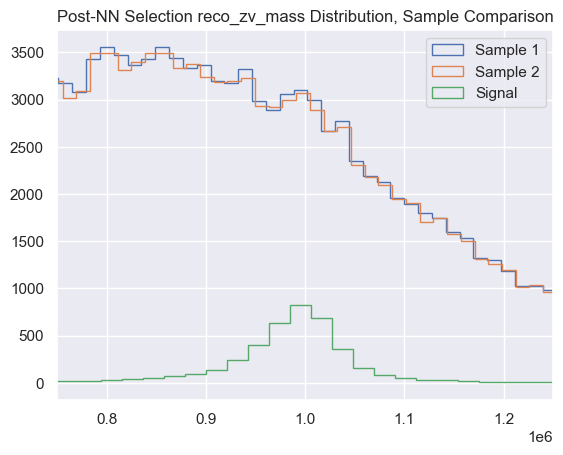

In [92]:
plt.figure()
plt.hist(selected_data['reco_zv_mass'], bins=200, histtype='step', weights=selected_data['FullEventWeight'])
plt.hist(selected_data_2['reco_zv_mass'], bins=200, histtype='step', weights=selected_data_2['FullEventWeight'])
plt.hist(data.gg['reco_zv_mass'], bins=200, histtype='step', weights=data.gg['FullEventWeight'])
plt.xlim(0.75*10**6, 1.25*10**6)
plt.title('Post-NN Selection reco_zv_mass Distribution, Sample Comparison')
plt.legend(['Sample 1', 'Sample 2', 'Signal'])
plt.show()

Based on the graph above, Sample 1, the cut dataset with no reco_zv_mass included as input, has a slightly higher background than Sample 2, which does include reco_zv_mass. This may result in a minor increase in signal visibility, but the overall shape of the curves do not change between samples. The signal peak, plotted in green, is located at the same mass value as the peak in the other mass distributions, indicating that the fluctuation is likely due to the presence of signal. 

(c) Discuss the reasons for the behaviour of the ML classifier after incorporating variable reco zv mass in the NN training, and its impact on the search sensitivity.

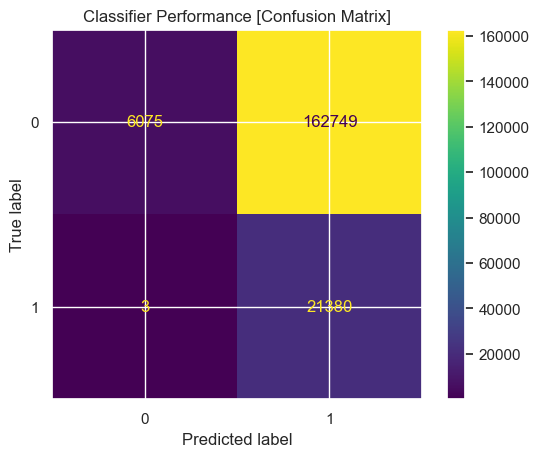

In [93]:
y_true = chosen_target_2
y_pred = to_binary(predicted_2)

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title('Classifier Performance [Confusion Matrix]')
plt.show()

Based on the values in the confusion matrix, including reco_zv_mass improved classification slightly. There were fewer false positives and false negatives than the previous sample. 